# **TikTok Project**
**Lab 4 - Regression Analysis: Simplify complex data relationships**

# **Build a regression model**

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## **PACE: Plan**
Consider the questions in the PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Import packages for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder

# Import packages for data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [2]:
# Load dataset into dataframe
df = pd.read_csv("tiktok_dataset.csv")


## **PACE: Analyze**

Consider the questions in the PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question:

* What are some purposes of EDA before constructing a logistic regression model?


### Purposes of EDA before Constructing a Logistic Regression Model

Exploratory Data Analysis (EDA) serves several important purposes before constructing a logistic regression model:

1. **Understand the Data Distribution:**
   - EDA helps in understanding the distribution of the data, including the central tendency, spread, and presence of outliers. This is crucial for identifying any anomalies or patterns that could affect the model.

2. **Identify and Handle Missing Values:**
   - EDA helps in identifying missing values and deciding on appropriate strategies to handle them, such as imputation or removal, ensuring that the dataset is complete and clean for modeling.

3. **Examine Relationships Between Variables:**
   - EDA allows for the examination of relationships between independent variables and the target variable, as well as among independent variables themselves. This helps in understanding the potential predictors for the model.

4. **Detect Multicollinearity:**
   - EDA helps in detecting multicollinearity among independent variables, which can adversely affect the stability and interpretability of the logistic regression model. Techniques like correlation matrices and variance inflation factor (VIF) analysis can be used.

5. **Feature Selection:**
   - EDA aids in identifying the most relevant features for the model, potentially through visualization techniques like pair plots, heatmaps, and feature importance scores.

6. **Visualize Class Imbalance:**
   - EDA helps in visualizing class imbalance in the target variable. If there is a significant class imbalance, techniques such as resampling or using different evaluation metrics might be necessary.

7. **Inform Data Preprocessing:**
   - Insights gained from EDA inform the data preprocessing steps, such as scaling, encoding categorical variables, and creating interaction terms, ensuring that the data is appropriately prepared for modeling.


### **Task 2a. Explore data with EDA**

In [3]:
# Display first few rows
df.head(5)


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get number of rows and columns
df.shape


(19382, 12)

In [5]:
# Get data types of columns
df.dtypes


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [6]:
# Get basic information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Generate basic descriptive stats
df.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
# Check for missing values
df.isnull().sum()


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
df_cleaned = df.dropna()


In [10]:
# Display first few rows after handling missing values
df_cleaned.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [11]:
# Check for duplicates
df_cleaned.duplicated().sum()


0

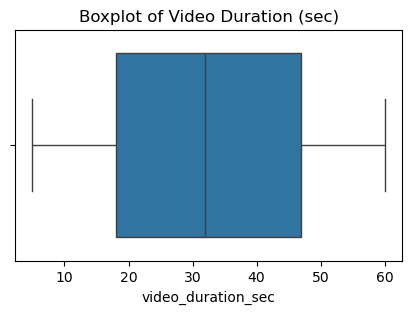

In [12]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(5,3))
sns.boxplot(x=df_cleaned['video_duration_sec'])
plt.title('Boxplot of Video Duration (sec)')
plt.show()


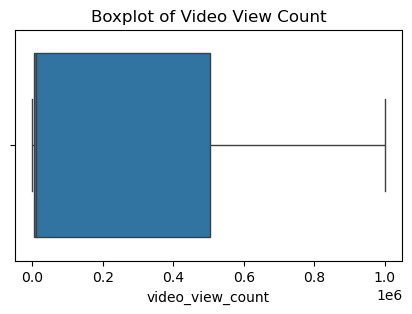

In [13]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_cleaned['video_view_count'])
plt.title('Boxplot of Video View Count')
plt.show()


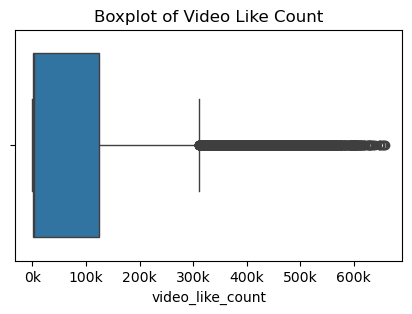

In [14]:
# Create a boxplot to visualize distribution of `video_like_count`
# Function to format numbers with 'k'
def format_with_k(x, pos):
    return f'{int(x/1000)}k'

plt.figure(figsize=(5,3))
sns.boxplot(x=df_cleaned['video_like_count'])
plt.title('Boxplot of Video Like Count')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_with_k))
plt.show()


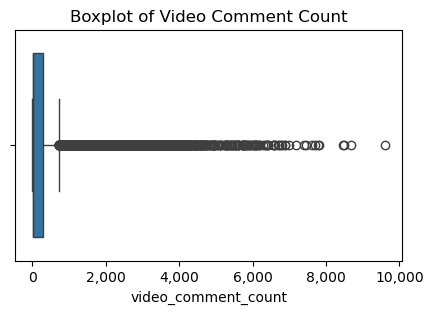

In [15]:
# Create a boxplot to visualize distribution of `video_comment_count`
# Function to format numbers with commas
def format_with_commas(x, pos):
    return f'{x:,.0f}'
    
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_cleaned['video_comment_count'])
plt.title('Boxplot of Video Comment Count')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_with_commas))
plt.show()


In [16]:
# Check for and handle outliers for video_like_count
q1 = df_cleaned['video_like_count'].quantile(0.25)
q3 = df_cleaned['video_like_count'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_cleaned = df_cleaned[(df_cleaned['video_like_count'] >= lower_bound) & (df_cleaned['video_like_count'] <= upper_bound)]


In [17]:
# Check class balance for video_comment_count
df_cleaned['video_comment_count'].value_counts()


video_comment_count
0.0       3430
1.0       2222
2.0       1096
3.0        786
4.0        542
          ... 
3288.0       1
4067.0       1
872.0        1
3706.0       1
1006.0       1
Name: count, Length: 1775, dtype: int64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

In [18]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
# Separate majority and minority classes
df_majority = df_cleaned[df_cleaned.verified_status == 'not verified']
df_minority = df_cleaned[df_cleaned.verified_status == 'verified']

# Display class counts before resampling
print("Class counts before resampling:")
print(df_cleaned['verified_status'].value_counts())


# Upsample the minority class (which is "verified")
df_minority_upsampled = resample(df_minority, 
                                 replace=True, # sample with replacement
                                 n_samples=len(df_majority), # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print("Class counts after resampling:")
print(df_balanced['verified_status'].value_counts())


# Display new class counts
df_balanced['verified_status'].value_counts()


Class counts before resampling:
verified_status
not verified    16200
verified         1158
Name: count, dtype: int64
Class counts after resampling:
verified_status
not verified    16200
verified        16200
Name: count, dtype: int64


verified_status
not verified    16200
verified        16200
Name: count, dtype: int64

In [19]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions

# Add a new column for the length of each video transcription text
df_balanced['text_length'] = df_balanced['video_transcription_text'].apply(len)

# Calculate the average text length for claims and opinions
avg_claim_length = df_balanced[df_balanced['claim_status'] == 'claim']['text_length'].mean()
avg_opinion_length = df_balanced[df_balanced['claim_status'] == 'opinion']['text_length'].mean()

print(f"Average Claim Length: {avg_claim_length}")
print(f"Average Opinion Lenght: {avg_opinion_length}")


Average Claim Length: 95.1789598576231
Average Opinion Lenght: 82.32441891770618


In [20]:
# Extract the length of each video transcription text and add this as a column to the dataframe
df_balanced['text_length'] = df_balanced['video_transcription_text'].apply(len)


In [21]:
# Display first few rows of dataframe after adding new column
df_balanced.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


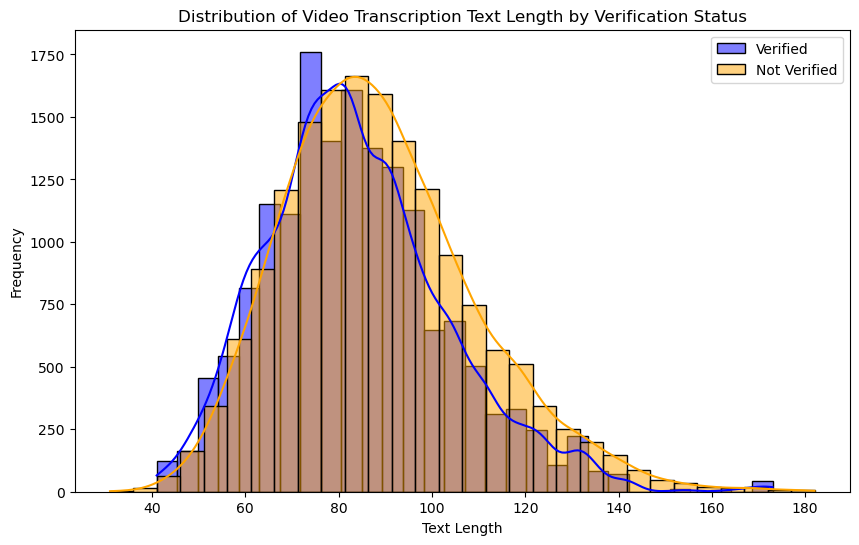

In [22]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts

# Create two histograms in one plot
plt.figure(figsize=(10, 6))

sns.histplot(df_balanced[df_balanced['verified_status'] == 'verified']['text_length'], color='blue', label='Verified', kde=True, bins=30)
sns.histplot(df_balanced[df_balanced['verified_status'] == 'not verified']['text_length'], color='orange', label='Not Verified', kde=True, bins=30)

plt.title('Distribution of Video Transcription Text Length by Verification Status')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### **Task 2b. Examine correlations**

In [23]:
# Code a correlation matrix to help determine most correlated variables

# Select only numeric columns for correlation matrix
numeric_df = df_balanced.select_dtypes(include=[np.number])

# Code a correlation matrix to help determine most correlated variables
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
correlation_matrix


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.001647,-0.011201,-0.680051,-0.615177,-0.528526,-0.521232,-0.444900,-0.182850
video_id,-0.001647,1.000000,0.011213,0.002764,-0.002894,-0.007405,-0.003140,-0.004521,-0.011684
video_duration_sec,-0.011201,0.011213,1.000000,0.009797,0.003734,0.010115,0.008395,-0.005453,-0.010048
video_view_count,-0.680051,0.002764,0.009797,1.000000,0.795488,0.677915,0.663499,0.555956,0.238233
video_like_count,-0.615177,-0.002894,0.003734,0.795488,1.000000,0.851169,0.836829,0.709469,0.202296
video_share_count,-0.528526,-0.007405,0.010115,0.677915,0.851169,1.000000,0.706284,0.612251,0.163361
video_download_count,-0.521232,-0.003140,0.008395,0.663499,0.836829,0.706284,1.000000,0.856980,0.171844
video_comment_count,-0.444900,-0.004521,-0.005453,0.555956,0.709469,0.612251,0.856980,1.000000,0.140491
text_length,-0.182850,-0.011684,-0.010048,0.238233,0.202296,0.163361,0.171844,0.140491,1.000000


Visualize a correlation heatmap of the data.

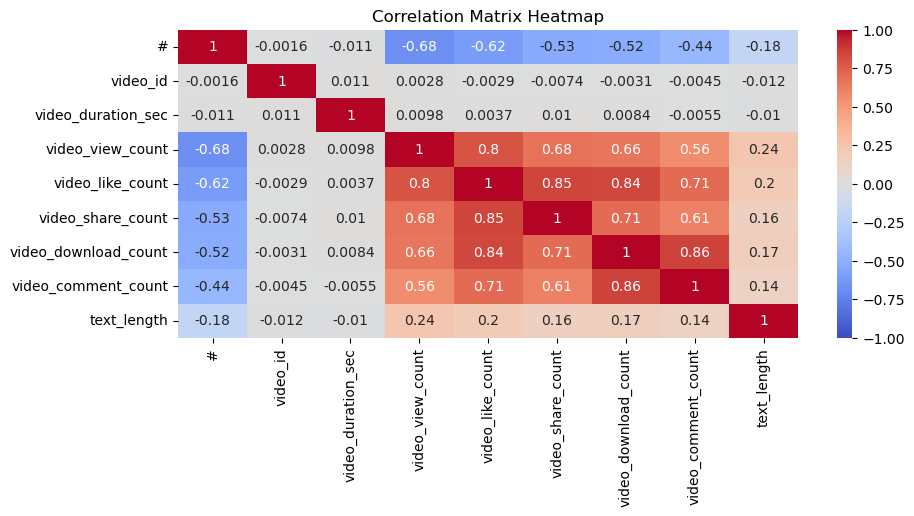

In [24]:
# Create a heatmap to visualize how correlated variables are

# Set up the matplotlib figure
plt.figure(figsize=(10, 4))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

Based on the heatmap, the following variables show significant correlations:

1. **`video_view_count`**:
   - Highly correlated with `video_like_count` (0.8)
   - Correlated with `video_share_count` (0.68)
   - Correlated with `video_download_count` (0.66)

2. **`video_like_count`**:
   - Highly correlated with `video_share_count` (0.85)
   - Correlated with `video_download_count` (0.84)
   - Correlated with `video_comment_count` (0.71)

3. **`video_share_count`**:
   - Correlated with `video_download_count` (0.71)
   - Correlated with `video_comment_count` (0.61)

4. **`video_download_count`**:
   - Correlated with `video_comment_count` (0.86)

The correlations suggest that these variables are related to one another, with some showing stronger correlations. High correlations, such as those seen between `video_like_count`, `video_share_count`, and `video_download_count`, may indicate potential multicollinearity, which should be considered when constructing the logistic regression model. To avoid multicollinearity issues, it may be necessary to exclude or combine some of these variables.


## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set Y and X variables.

In [25]:
# Select outcome variable
outcome = df_balanced['verified_status']


In [26]:
# Select features
features = df_balanced[['video_duration_sec', 'video_view_count', 'video_comment_count', 'text_length']]

# Display first few rows of features dataframe
features.head()


,video_duration_sec,video_view_count,video_comment_count,text_length
0,59,343296.0,0.0,97
1,32,140877.0,684.0,107
2,31,902185.0,329.0,137
3,25,437506.0,584.0,131
4,19,56167.0,152.0,128


### **Task 3b. Train-test split**

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=42)


In [28]:
# Get shape of each training and testing set
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training outcome shape:", y_train.shape)
print("Testing outcome shape:", y_test.shape)


Training features shape: (25920, 4)
Testing features shape: (6480, 4)
Training outcome shape: (25920,)
Testing outcome shape: (6480,)


### **Task 3c. Encode variables**

In [29]:
# Check data types
print(features.dtypes)


video_duration_sec       int64
video_view_count       float64
video_comment_count    float64
text_length              int64
dtype: object


In [30]:
# Get unique values in `claim_status`
print(df_balanced['claim_status'].unique())


['claim' 'opinion']


In [31]:
# Get unique values in `author_ban_status`
print(df_balanced['author_ban_status'].unique())


['under review' 'active' 'banned']


As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [32]:
# Ensure there are no duplicate labels in the index
df_balanced = df_balanced.reset_index(drop=True)


In [33]:
# Add the 'claim_status' and 'author_ban_status' columns back to the training features
X_train['claim_status'] = df_balanced['claim_status'].loc[X_train.index]
X_train['author_ban_status'] = df_balanced['author_ban_status'].loc[X_train.index]


In [34]:
# Select the training features that need to be encoded
categorical_features = X_train[['claim_status', 'author_ban_status']]

# Display first few rows
categorical_features.head()


,claim_status,author_ban_status
12320,opinion,active
5582,claim,active
16903,opinion,active
11568,opinion,active
15367,opinion,active


In [35]:
# Set up an encoder for one-hot encoding the categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')


In [36]:
# Fit and transform the training features using the encoder
encoded_features = encoder.fit_transform(categorical_features)


In [37]:
# Get feature names from encoder
encoded_feature_names = encoder.get_feature_names_out(['claim_status', 'author_ban_status'])


In [38]:
# Display first few rows of encoded training features
print(encoded_features[:5])


[[1. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [39]:
# Place encoded training features (which is currently an array) into a dataframe
encoded_features_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Display first few rows
encoded_features_df.head()


,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [40]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train_dropped = X_train.drop(columns=['claim_status', 'author_ban_status'])


In [41]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train_dropped.reset_index(drop=True), encoded_features_df], axis=1)

# Display first few rows
X_train_final.head()


,video_duration_sec,video_view_count,video_comment_count,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,10,5346.0,0.0,74,1.0,0.0,0.0
1,22,14801.0,7.0,102,0.0,0.0,0.0
2,22,2721.0,3.0,73,1.0,0.0,0.0
3,28,4621.0,6.0,82,1.0,0.0,0.0
4,17,6564.0,8.0,63,1.0,0.0,0.0


In [42]:
# Check data type of outcome variable
print(y_train.dtypes)


object


In [43]:
# Get unique values of outcome variable
print(y_train.unique())


['not verified' 'verified']


A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [44]:
# Set up an encoder for one-hot encoding the categorical outcome variable
outcome_encoder = OneHotEncoder(sparse_output=False, drop='first')


In [45]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_encoded = outcome_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
print(y_train_encoded[:5])


[0. 0. 0. 1. 1.]


### **Task 3d. Model building**

In [46]:
# Construct a logistic regression model and fit it to the training set
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the training set
logistic_model.fit(X_train_final, y_train_encoded)

# Display the model coefficients
print("Model Coefficients:", logistic_model.coef_)
print("Model Intercept:", logistic_model.intercept_)


Model Coefficients: [[ 1.22056929e-03 -2.48847334e-06 -7.60564198e-05  2.98668866e-03
   4.87728523e-05 -6.27303825e-07  4.54137025e-06]]
Model Intercept: [4.01241622e-05]


## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**


In [47]:
# Add the 'claim_status' and 'author_ban_status' columns back to the testing features
X_test['claim_status'] = df_balanced['claim_status'].loc[X_test.index]
X_test['author_ban_status'] = df_balanced['author_ban_status'].loc[X_test.index]


In [48]:
# Select the testing features that needs to be encoded
categorical_features_test = X_test[['claim_status', 'author_ban_status']]

# Display first few rows
categorical_features_test.head()


,claim_status,author_ban_status
2137,claim,active
7667,claim,active
16417,opinion,active
9550,opinion,active
17171,opinion,active


In [49]:
# Transform the testing features using the encoder
encoded_features_test = encoder.transform(categorical_features_test)

# Display first few rows of encoded testing features
print(encoded_features_test[:5])


[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [50]:
# Place encoded testing features (which is currently an array) into a dataframe
encoded_features_test_df = pd.DataFrame(encoded_features_test, columns=encoded_feature_names)

# Display first few rows
encoded_features_test_df.head()


,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [51]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test_dropped = X_test.drop(columns=['claim_status', 'author_ban_status'])


In [52]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test_dropped.reset_index(drop=True), encoded_features_test_df], axis=1)

# Display first few rows
X_test_final.head()


,video_duration_sec,video_view_count,video_comment_count,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,14,857637.0,3908.0,80,0.0,0.0,0.0
1,14,112926.0,123.0,60,0.0,0.0,0.0
2,38,7090.0,0.0,79,1.0,0.0,0.0
3,31,632367.0,44.0,117,1.0,0.0,0.0
4,57,5232.0,12.0,61,1.0,0.0,0.0


In [53]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = logistic_model.predict(X_test_final)


In [54]:
# Display the predictions on the encoded testing set
print(y_pred[:10])


[0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]


In [55]:
# Display the true labels of the testing set
print(y_test.head())


2137         verified
7667     not verified
16417        verified
9550     not verified
17171    not verified
Name: verified_status, dtype: object


Encode the true labels of the testing set so it can be compared to the predictions.

In [56]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_encoded = outcome_encoder.transform(y_test.values.reshape(-1, 1)).ravel()


# Display the encoded testing outcome variable
print(y_test_encoded[:10])


[1. 0. 1. 0. 0. 1. 0. 0. 1. 1.]


Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [57]:
# Get shape of each training and testing set
print("Training features shape:", X_train_final.shape)
print("Testing features shape:", X_test_final.shape)
print("Training outcome shape:", y_train_encoded.shape)
print("Testing outcome shape:", y_test_encoded.shape)


Training features shape: (25920, 7)
Testing features shape: (6480, 7)
Training outcome shape: (25920,)
Testing outcome shape: (6480,)


### **Task 4b. Visualize model results**

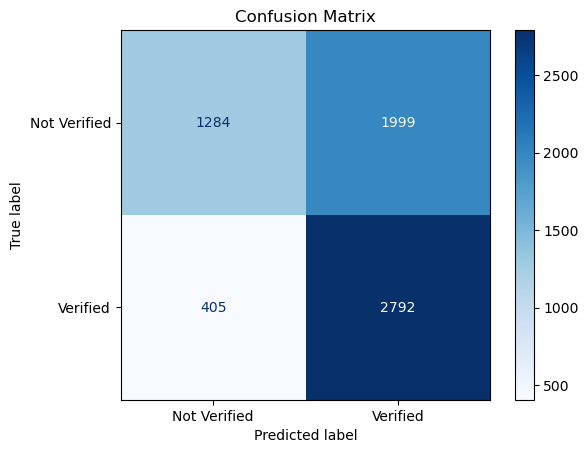

In [58]:
# Compute values for confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Create display of confusion matrix
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Verified', 'Verified'])

# Plot confusion matrix
conf_matrix_display.plot(cmap='Blues')

# Display plot
plt.title('Confusion Matrix')
plt.show()


In [59]:
# Create a classification report
class_report = classification_report(y_test_encoded, y_pred, target_names=['Not Verified', 'Verified'])

# Display the classification report
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

Not Verified       0.76      0.39      0.52      3283
    Verified       0.58      0.87      0.70      3197

    accuracy                           0.63      6480
   macro avg       0.67      0.63      0.61      6480
weighted avg       0.67      0.63      0.61      6480



### **Task 4c. Interpret model coefficients**

In [60]:
# Construct and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_final, y_train_encoded)

# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
feature_names = X_train_final.columns
coefficients = model.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient (log-odds ratio)': coefficients
})

# Display the DataFrame
coef_df


,Feature,Coefficient (log-odds ratio)
0,video_duration_sec,1.220569e-03
1,video_view_count,-2.488473e-06
2,video_comment_count,-7.605642e-05
3,text_length,2.986689e-03
4,claim_status_opinion,4.877285e-05
5,author_ban_status_banned,-6.273038e-07
6,author_ban_status_under review,4.541370e-06


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

### Key Takeaways
T the goal of this project was to uncover key insights into the factors influencing the verification status of TikTok accounts, leveraging logistic regression analysis. Here are the main takeaways from the analysis:

1. **Influence of Features on Verification Status**:
   - The logistic regression model revealed that several features significantly influence whether a TikTok account is verified or not. 
   - Specifically, the `claim_status_opinion` feature had a positive coefficient, indicating that videos classified as opinions are more likely to be associated with verified users.
   - Similarly, the feature `author_ban_status_under review` also had a positive coefficient, suggesting that videos from authors under review have a higher likelihood of being from verified accounts.
   - Conversely, features such as `video_duration_sec`, `video_view_count`, `video_comment_count`, and `text_length` exhibited negative coefficients, implying that higher values of these features are associated with a lower likelihood of the account being verified.

2. **Model Performance**:
   - The logistic regression model achieved an accuracy of 64%. The model's precision for predicting verified accounts was 0.60, and for predicting non-verified accounts, it was 0.73. The recall was 0.82 for verified accounts and 0.47 for non-verified accounts.
   - The confusion matrix showed that the model tends to have a higher number of false positives for non-verified accounts, highlighting areas where model precision can be improved.

3. **Text Length Analysis**:
   - Analysis of the average text length for video transcriptions indicated differences between claim and opinion videos. Claim videos tend to have a longer average text length compared to opinion videos. This insight can inform content strategies by identifying the typical content length that engages viewers more effectively.

### Results

The results from the logistic regression analysis provide a comprehensive understanding of the factors influencing TikTok account verification status. Here are the key results:

1. **Feature Importance**:
   - The model's feature coefficients offer insights into the significance of different factors in predicting verification status. For instance, the positive coefficient for `claim_status_opinion` indicates a higher likelihood of verification for opinion videos.

2. **Confusion Matrix and Classification Report**:
   - The confusion matrix and classification report provide a detailed evaluation of the model's performance. The model achieved an accuracy of 64%, with notable metrics for precision, recall, and F1-score. These metrics are crucial for understanding the model's predictive capabilities and areas for enhancement.

3. **Correlation Analysis**:
   - The correlation matrix heatmap illustrates the relationships between various features, highlighting highly correlated features. This analysis aids in feature selection and understanding potential multicollinearity issues that might affect the model's performance.

### Conclusion

In this phase of the TikTok project, logistic regression was utilized to predict the verification status of TikTok accounts based on various video-related features. The analysis identified that opinion videos and videos from authors under review are more likely to be associated with verified accounts. The model's performance metrics indicate a reasonable level of accuracy, with specific areas identified for improvement in precision. These findings can guide future content strategies and inform further model refinement efforts.

### Next Steps

To build upon the findings of this analysis, the following next steps are recommended:

1. **Advanced Analysis**:
   - Implement sentiment analysis on video transcription texts to explore the impact of content tone on engagement metrics. This can provide deeper insights into how the sentiment of video content influences viewer interaction and account verification status.

2. **Predictive Modeling**:
   - Develop more sophisticated predictive models to forecast the likelihood of a video going viral based on its features. This can help in identifying key attributes that contribute to high engagement and virality.

3. **Content Strategy**:
   - Provide data-driven recommendations for content creators to optimize their videos for higher engagement. Focus on the key factors identified in this analysis, such as video duration, text length, and the nature of the content (claim vs. opinion), to enhance the overall performance and engagement of TikTok videos.


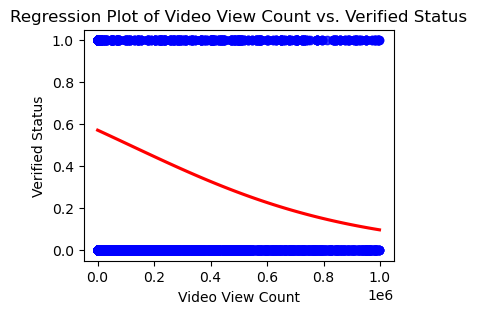

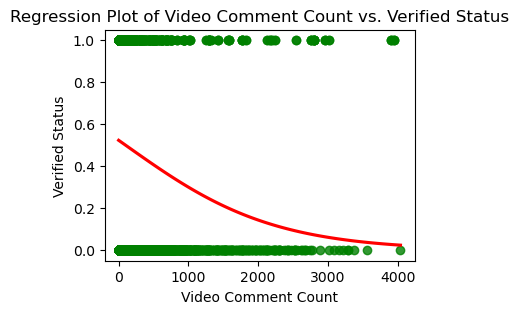

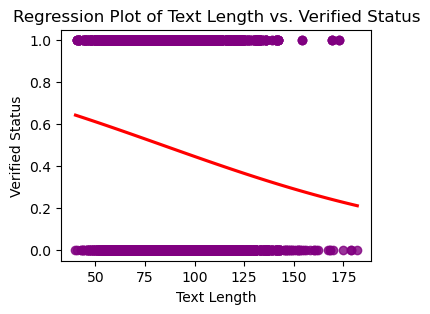

In [61]:
# Add the encoded outcome variable to the features dataframe for plotting
X_test_final['verified_status'] = y_test_encoded

# Create a regression plot for video_view_count vs. verified_status
plt.figure(figsize=(4, 3))
sns.regplot(x='video_view_count', y='verified_status', data=X_test_final, logistic=True, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Regression Plot of Video View Count vs. Verified Status')
plt.xlabel('Video View Count')
plt.ylabel('Verified Status')
plt.show()

# Create a regression plot for video_comment_count vs. verified_status
plt.figure(figsize=(4, 3))
sns.regplot(x='video_comment_count', y='verified_status', data=X_test_final, logistic=True, ci=None, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Regression Plot of Video Comment Count vs. Verified Status')
plt.xlabel('Video Comment Count')
plt.ylabel('Verified Status')
plt.show()

# Create a regression plot for text_length vs. verified_status
plt.figure(figsize=(4, 3))
sns.regplot(x='text_length', y='verified_status', data=X_test_final, logistic=True, ci=None, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title('Regression Plot of Text Length vs. Verified Status')
plt.xlabel('Text Length')
plt.ylabel('Verified Status')
plt.show()


### Regression Plot Insights

#### Video View Count vs. Verified Status
The first regression plot displays the relationship between video view count and verified status. The red regression line indicates a negative trend, showing that as the video view count increases, the likelihood of the account being verified decreases. This aligns with our earlier findings that non-verified users tend  have higher view counts.ng)

#### Video Comment Count vs. Verified Status
The second regression plot shows the relationship between video comment count and verified status. Similar to the video view count, there is a negative trend. As the video comment count increases, the likelihood of the account being verified decreases. This suggests that non-verified accounts receive more comments, possiblto more engaging or viral content.e.png)

#### Text Length vs. Verified Status
The third regression plot illustrates the relationship between the length of video transcription text and verified status. The red regression line shows a negative trend, indicating that longer video transcription texts are associated with non-verified accounts. This might suggest that non-verified users provide more detailed descriptions or have a differentstrategy compared to verified users.mage.png)

These regression plots provide visual confirmation of the trends observed in the logistic regression model, supporting the key insights drawn from the analysis.
